### LOADING IMDB DATASET

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

max([max(sequence) for sequence in train_data])

9999

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

### DECODING REVIEWS INTO ENGLISH

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#print(reverse_word_index)


In [6]:
#single comment/review
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
#print(decoded_review)

### ENCODING INTO BINARY MATRIX AND VECTORIZING DATA

In [7]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
    
x_traindata = vectorize_sequences(train_data)
x_testdata = vectorize_sequences(test_data)

In [8]:
x_traindata[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_trainlabel = np.asarray(train_labels).astype('float32')
y_testlabel = np.asarray(test_labels).astype('float32')

### CREATING MODEL/NETWORK

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#since binary classification so, the output laye that is the last layer will only contain one node
#either it is true or false that is either it is positive review or negative.
#sigmoid function will always return 0 or 1 used for binary classification

In [7]:
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#### in case the optimizer or loss function is not accessed directly the following code can be used to access them from their respective libraries

In [ ]:
#from tensorflow.keras import losses
#from tensorflow.keras import metrics

#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#loss=losses.binary_crossentropy,
#metrics=[metrics.binary_accuracy])

### CREATING VALIDATION DATASET

In [11]:
#from 25000 data 10000 will be sliced for validation data and the remaining will be trained
x_val = x_traindata[:10000]
remaining_x_traindata = x_traindata[10000:]

y_val = y_trainlabel[:10000]
remaining_y_trainlabel = y_trainlabel[10000:]

### COMPILING AND TRAINING

In [12]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(remaining_x_traindata,remaining_y_trainlabel,epochs=4,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 10s 660us/sample - loss: 0.5364 - acc: 0.7773 - val_loss: 0.4159 - val_acc: 0.8722
Epoch 2/4
15000/15000 [==============================] - 2s 137us/sample - loss: 0.3312 - acc: 0.8989 - val_loss: 0.3325 - val_acc: 0.8701
Epoch 3/4
15000/15000 [==============================] - 2s 149us/sample - loss: 0.2400 - acc: 0.9249 - val_loss: 0.2875 - val_acc: 0.8897
Epoch 4/4
15000/15000 [==============================] - 2s 141us/sample - loss: 0.1886 - acc: 0.9417 - val_loss: 0.2815 - val_acc: 0.8867


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Plotting the training and validation loss

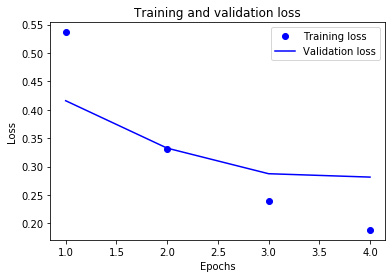

In [16]:

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy

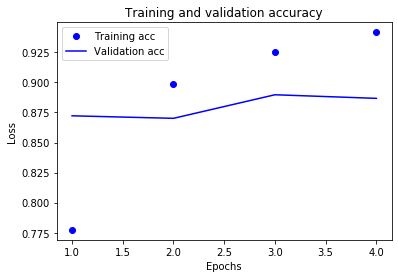

In [15]:

plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.predict(x_testdata)

array([[0.32494402],
       [0.9997828 ],
       [0.96600056],
       ...,
       [0.16322348],
       [0.20700663],
       [0.61293125]], dtype=float32)

### Retraining a model from scratch

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_traindata, y_trainlabel, epochs=4, batch_size=512)


Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 157us/sample - loss: 0.4352 - accuracy: 0.8197
Epoch 2/4
25000/25000 [==============================] - 2s 87us/sample - loss: 0.2507 - accuracy: 0.9120
Epoch 3/4
25000/25000 [==============================] - 2s 93us/sample - loss: 0.1951 - accuracy: 0.9306
Epoch 4/4
25000/25000 [==============================] - 2s 96us/sample - loss: 0.1657 - accuracy: 0.9419


In [12]:
results = model.evaluate(x_testdata, y_testlabel)
print(results)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3117103725147247, 0.87788]
